In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

In [31]:
# Read the Excel file
df = pd.read_csv(r"H:\DataScience-Lab\Sem-2\Time series analysis & forecasting\files\dow_Jhones.csv")

# Display the DataFrame
df


,Date,Dow Jones
0,Jun-99,10970.8
1,Jul-99,10655.2
2,Aug-99,10829.3
3,Sep-99,10337.0
4,Oct-99,10729.9
...,...,...
80,Feb-06,10993.4
81,Mar-06,11109.3
82,Apr-06,11367.1
83,May-06,11168.3


In [32]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df

,Date,Dow Jones
0,1999-06-01,10970.8
1,1999-07-01,10655.2
2,1999-08-01,10829.3
3,1999-09-01,10337.0
4,1999-10-01,10729.9
...,...,...
80,2006-02-01,10993.4
81,2006-03-01,11109.3
82,2006-04-01,11367.1
83,2006-05-01,11168.3


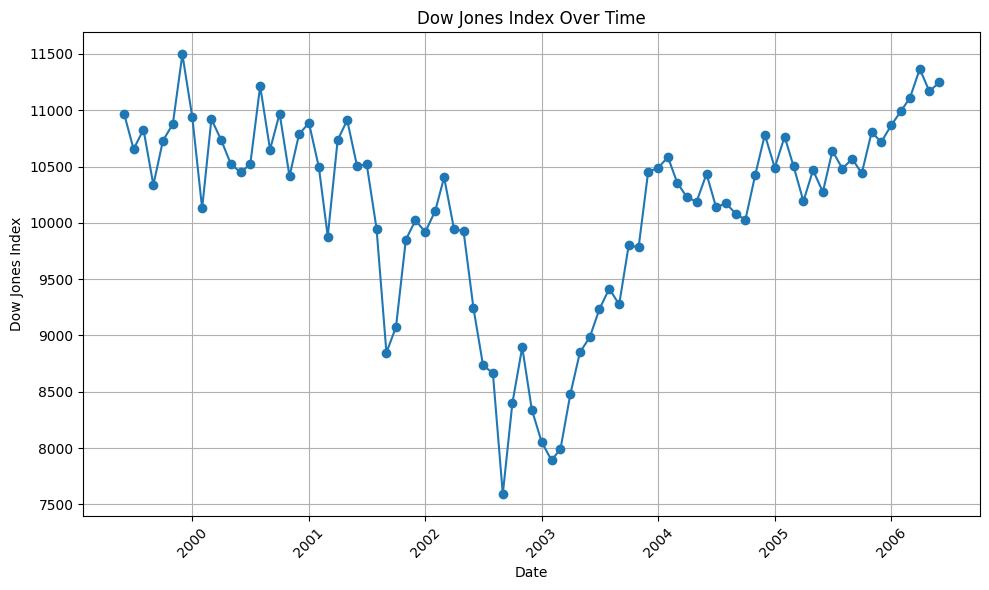

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Dow Jones'], marker='o', linestyle='-')
plt.title('Dow Jones Index Over Time')
plt.xlabel('Date')
plt.ylabel('Dow Jones Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
def smooth(y, alpha=0.2):
    smoothed_y = np.zeros_like(y)
    smoothed_y[0] = y[0]

    for i in range(1, len(y)):
        smoothed_y[i] = alpha * y[i] + (1 - alpha) * smoothed_y[i - 1]

    return smoothed_y

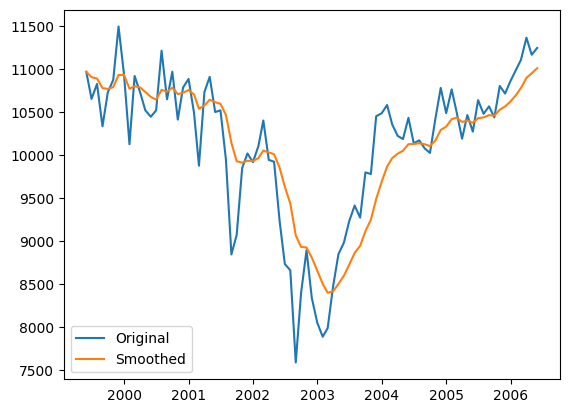

In [36]:
smoothed_y = smooth(df['Dow Jones'], alpha=0.2)
plt.plot(df['Date'], df['Dow Jones'], label='Original')
plt.plot(df['Date'], smoothed_y, label='Smoothed')
plt.legend()
plt.show()

In [37]:
def smooth(y, alpha=0.2):
    smoothed_y = np.zeros_like(y)
    smoothed_y[0] = y[0]

    for i in range(1, len(y)):
        smoothed_y[i] = alpha * y[i] + (1 - alpha) * smoothed_y[i - 1]

    return smoothed_y

In [38]:
smoothed_y = smooth(df['Dow Jones'], alpha=0.2)

In [39]:
smoothed_y2 = smooth(df['Dow Jones'], alpha=0.4)

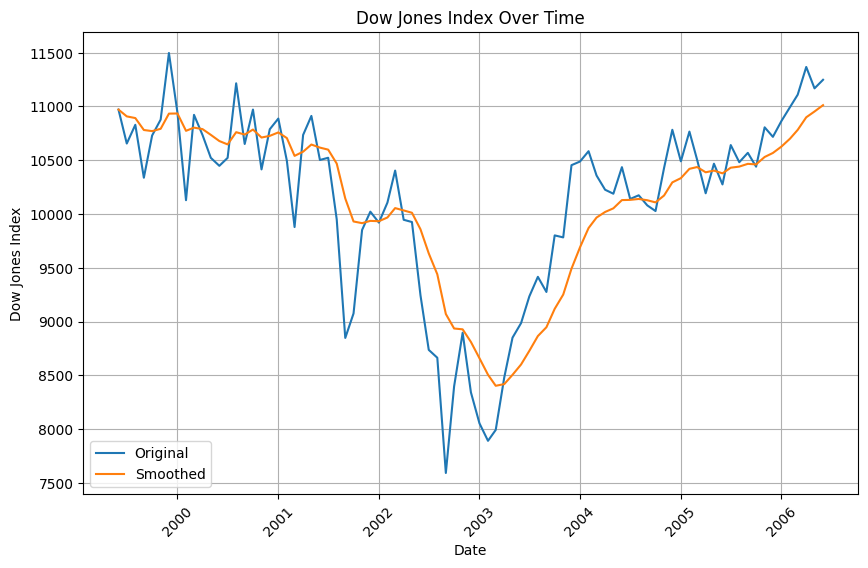

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Dow Jones'], label='Original')
plt.plot(df['Date'], smoothed_y, label='Smoothed')
plt.title('Dow Jones Index Over Time')
plt.xlabel('Date')
plt.ylabel('Dow Jones Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

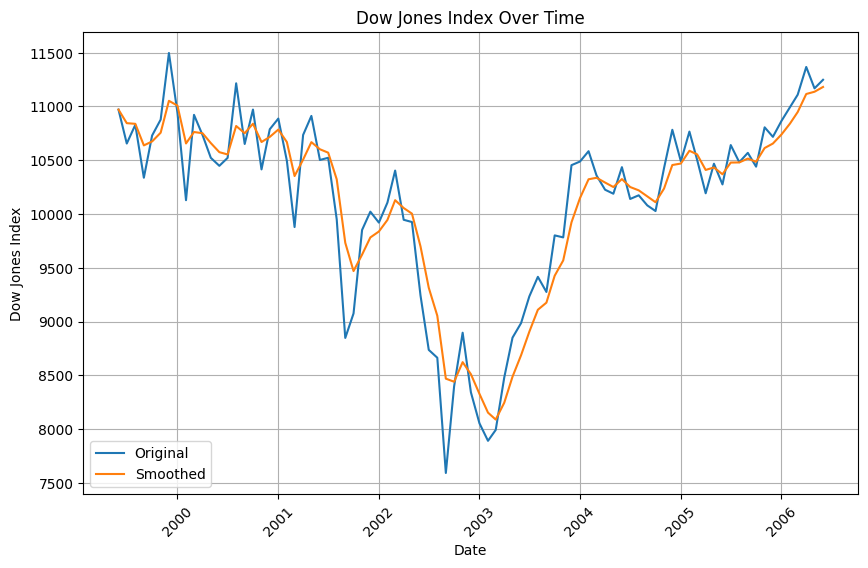

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Dow Jones'], label='Original')
plt.plot(df['Date'], smoothed_y2, label='Smoothed')
plt.title('Dow Jones Index Over Time')
plt.xlabel('Date')
plt.ylabel('Dow Jones Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

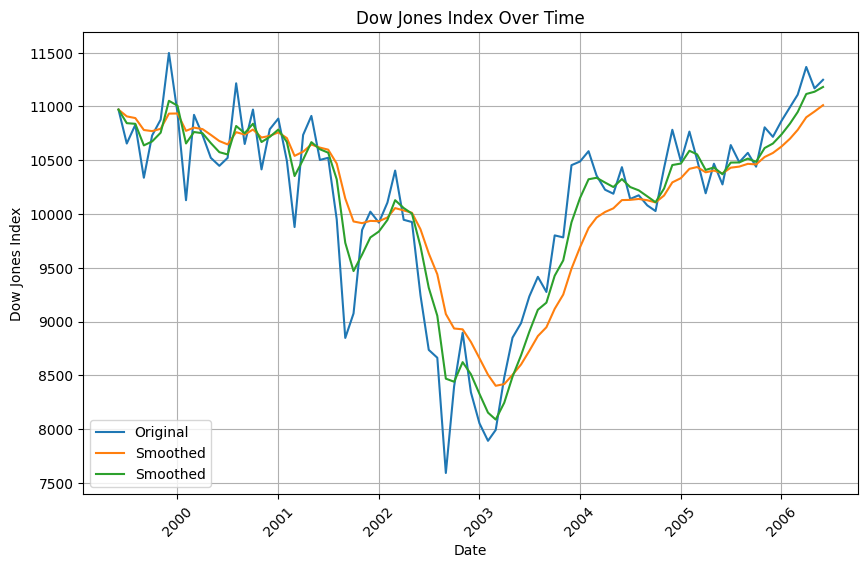

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Dow Jones'], label='Original')
plt.plot(df['Date'], smoothed_y, label='Smoothed')
plt.plot(df['Date'], smoothed_y2, label='Smoothed')
plt.title('Dow Jones Index Over Time')
plt.xlabel('Date')
plt.ylabel('Dow Jones Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [15]:
df.rename({"Dow Jones" :"y"}, axis =1, inplace =True)

In [9]:
df

,Date,y
0,Jun-99,"10,970.8"
1,Jul-99,"10,655.2"
2,Aug-99,"10,829.3"
3,Sep-99,"10,337"
4,Oct-99,"10,729.9"
...,...,...
80,Feb-06,"10,993.4"
81,Mar-06,"11,109.3"
82,Apr-06,"11,367.1"
83,May-06,"11,168.3"


In [11]:
y = df["y"].to_list()

In [12]:
def single_exponential_smoothing(data, alpha):
    smoothed_values = [data[0]]  # Initialize the smoothed values with the first value of data
    for i in range(1, len(data)):
        smoothed_value = alpha * data[i] + (1 - alpha) * smoothed_values[i-1]
        smoothed_values.append(smoothed_value)
    return smoothed_values